Name: Aditya Kamath

Btech EXTC Sem 6

Experiment no: 6

Date of Performance: 5/3/21

In [ ]:
import numpy as np
from scipy.fftpack import dct, idct
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
#Function to implement 2D DCT and IDCT
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

# DCT and IDCT on a random matrix

In [ ]:
# Generate a random integer matrix of size x X y 
x=8
y=8
f= np.random.randint(9,11,size=(x,y))
F= dct2(f)
print(f)
print(F)

[[10 10 10  9  9  9 10 10]
 [10  9 10 10  9  9 10  9]
 [10 10  9  9  9 10 10  9]
 [10 10  9 10 10 10 10  9]
 [ 9 10  9  9 10 10 10  9]
 [10 10  9  9  9  9 10 10]
 [ 9  9  9 10 10  9  9  9]
 [ 9  9 10 10 10 10  9  9]]
[[ 7.61250000e+01  2.74943622e-01  1.07277679e-01  6.48820754e-01
  -3.75000000e-01  4.33528168e-01 -7.20930995e-01  5.46896867e-02]
 [ 5.36323726e-01  4.39709190e-01  1.39024216e+00 -8.12897817e-02
  -5.94797776e-01  6.98299497e-01 -7.00023738e-02  2.02164571e-01]
 [-2.98619396e-01  2.48908912e-01 -3.90165043e-01 -1.22211258e+00
   4.33918421e-01  4.09613312e-01  8.99048519e-01  4.22955601e-01]
 [-1.18414134e-01 -1.95990757e-01  1.23706444e+00 -6.61687845e-01
   7.23266163e-02 -3.65484942e-01 -4.27971882e-01  4.08671330e-01]
 [ 6.25000000e-01 -1.93582245e-01 -6.25260137e-01  1.88331848e-01
  -3.75000000e-01 -6.00048173e-01  1.23692204e-01  6.70762188e-02]
 [ 4.54208091e-02  1.21658756e-01  1.55947439e-01  1.34515058e-01
   4.73542147e-01 -2.95418937e-01 -3.33622060e-01 -2

In [ ]:
#Find Energy of the original image
fenergy= np.sum(f**2)
print(fenergy)


5811


In [ ]:
#Find Energy of the DCT of the image
Fenergy= np.sum(F**2)
print(Fenergy)

5811.000000000003


In [ ]:
#Energy in the DC coefficient
F[0,0]**2

5795.015625000002

In [ ]:
#Retain coefficients with energy more that 0.01% of the Total energy
P= 0.0001*Fenergy
print(P)

0.5811000000000003


In [ ]:
Fnew= np.where(F**2 > P, F,0)
print(Fnew)

[[76.125       0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          1.39024216  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -1.22211258  0.          0.
   0.89904852  0.        ]
 [ 0.          0.          1.23706444  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          1.39904852  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Fnew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

6


In [ ]:
#Compression Ratio
Original = x*y
Compressed = nonzeros
CR= Original/Compressed
print(CR)

10.666666666666666


In [ ]:
#retrieving the estimate of the original matrix
fnew= idct2(Fnew)
fnew= fnew.astype(int)
print(fnew)

[[10  9  9  8  8  9  9 10]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  8]
 [ 9  9  9  9  9  9  9  9]
 [ 9  9  9  9  9  9  9  9]
 [ 8  9  9 10  9  9  9  9]
 [ 8  9 10 10  9  9  9  9]]


In [ ]:
#Obtain Mean Square Error between f and fnew
mse= np.sum(((f-fnew)**2))/(x*y)
print(mse)

0.515625


In [ ]:
# Retain first row of the transformed matrix
Fnew1= np.zeros((x,y), dtype =float)
Fnew1[0,:]= F[0,:]
print(Fnew1)

[[ 7.61250000e+01  2.74943622e-01  1.07277679e-01  6.48820754e-01
  -3.75000000e-01  4.33528168e-01 -7.20930995e-01  5.46896867e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [ ]:
fnew1= idct2(Fnew1)
fnew1= fnew1.astype(int)
print(fnew1)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


In [ ]:
# Retain first row and first column of the transformed matrix
Fnew2= np.zeros((x,y), dtype =float)
Fnew2[0,:]= F[0,:]
Fnew2[:,0]= F[:,0]
print(Fnew2)

[[ 7.61250000e+01  2.74943622e-01  1.07277679e-01  6.48820754e-01
  -3.75000000e-01  4.33528168e-01 -7.20930995e-01  5.46896867e-02]
 [ 5.36323726e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.98619396e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.18414134e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.25000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.54208091e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.58991229e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.08696279e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   

In [ ]:
fnew2= idct2(Fnew2)
fnew2= fnew2.astype(int)
print(fnew2)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 8]
 [9 9 9 9 9 9 9 9]]


In [ ]:
#Retain the first four coefficients
Fnew3= np.zeros((x,y), dtype =float)
Fnew3[0:2,0:2]= F[0:2,0:2]
print(Fnew3)

[[76.125       0.27494362  0.          0.          0.          0.
   0.          0.        ]
 [ 0.53632373  0.43970919  0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.        ]]


In [ ]:
fnew3= idct2(Fnew3)
fnew3= fnew3.astype(int)
print(fnew3)

[[9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9]]


# DCT on image with and without compression

In [ ]:
img = cv2.imread('/content/lena_gray_256.tif',0)  # Read the image
m,n= img.shape #Find and store size of image in m,n
print(m,n)

256 256


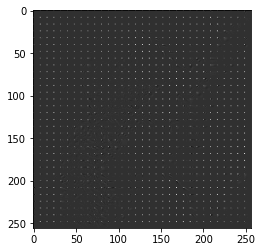

In [ ]:
#Find DCT of the given image using DCT function 
N=8 #Size of the block
imgdct = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               imgdct[row*N:(row+1)*N,col*N:(col+1)*N]= dct2(img[row*N:(row+1)*N,col*N:(col+1)*N])
plt.imshow(imgdct, cmap="gray")


In [ ]:
#Total energy of the image
energy= np.sum(img**2)
print(energy)

6941402


In [ ]:
#For compression, retaining only P percent coefficients with max magnitude. 
P= 0.0001*energy
Inew= np.where(imgdct**2 > P, imgdct,0)


In [ ]:
# Finding the nonzero values in the compressed matrix
ind,val= np.unique(Inew,return_counts=True)
nonzeros = np.sum(val[np.where(ind!=0)])
print(nonzeros)

5585


In [ ]:
#finding nonzero values in the compressed matrix
nonzeros= np.sum([Inew!=0])
print(nonzeros)

5585


In [ ]:
#Compression Ratio
CR= (m*n)/nonzeros
print("total Coefficient in the inpur image is ", m*n)
print("total coefficients retained in the output image is ", nonzeros)
print("compression ratio = input size/output size = ", CR)

total Coefficient in the inpur image is  65536
total coefficients retained in the output image is  5585
compression ratio = input size/output size =  11.734288272157565


In [ ]:
#Find IDCT of the given image  using IDCT function
inew = np.zeros((m,n), dtype=int)
for row in range(m//N):
        for col in range(n//N):
               inew[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(Inew[row*N:(row+1)*N,col*N:(col+1)*N])

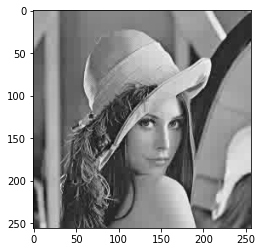

In [ ]:
plt.imshow(inew,cmap="gray")

# My Codes

512 512
245


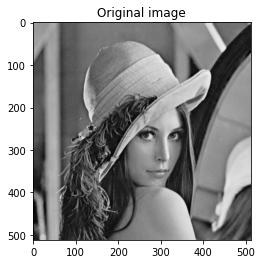

In [ ]:
#Read  the original image
img1 = cv2.imread("/content/lena_gray_512.tif",0)
m,n = img1.shape
print(m,n)
L = img1.max()
print(L)
plt.title('Original image')
plt.imshow(img1,cmap='gray')

In [ ]:
#Function to implement 2D DCT and IDCT
def dct2(a):
    return dct(dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return idct(idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

def img_dct(img):
    N=8
    img_temp = np.zeros((m,n), dtype=int)
    for i in range(m//N):
        for j in range(n//N):
            img_temp[i*N:(i+1)*N,j*N:(j+1)*N]= dct2(img[i*N:(i+1)*N,j*N:(j+1)*N])
    return(img_temp)

#Find IDCT of the given image  using IDCT function

def img_idct(new_img):
    inew = np.zeros((m,n), dtype=int)
    N=8
    for row in range(m//N):
        for col in range(n//N):
            inew[row*N:(row+1)*N,col*N:(col+1)*N]= idct2(new_img[row*N:(row+1)*N,col*N:(col+1)*N])
            
    return(inew)
    
# function to get the details of an image
def img_details(img,percent):
    temp_img = img_dct(img)
    
    # energy in the image
    eng = np.sum(temp_img**2)
    
    # compressing the image by retaining only values with high magnitude
    P= percent/100*eng
    Inew= np.where(temp_img**2 > P, temp_img,0)
    
    # number of non-zero values in the new image
    nonzeros= np.sum([Inew!=0])
    
    #Compression Ratio
    CR= (m*n)/nonzeros
        
    # mean square error
    MSE = mean_squared_error(Inew,img1)
    
    x = [Inew,percent,nonzeros, CR, MSE]
    return(x)

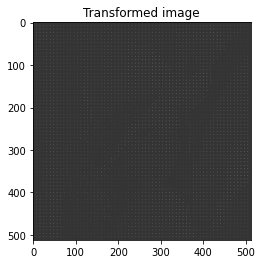

In [ ]:
new_img = img_dct(img1)
plt.title('Transformed image')
plt.imshow(new_img, cmap="gray")

In [ ]:
# dictionary to save values for different percentages
d = {1:img_details(img1,0.1)[:], 2:img_details(img1,0.01)[:], 3:img_details(img1,0.001)[:], 4:img_details(img1,0.000001)[:]}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in long_scalars


In [ ]:
print ("{:<8} {:<15} {:<30} {:<10}".format('%','Zeros','CR','MSE'))
for k, v in d.items():
    img,per, non_zero, CR, MSE = v
    
    print ("{:<8} {:<15} {:<30} {:<10}".format(per, ((m*n)-non_zero) , CR, MSE))
    

%        Zeros           CR                             MSE       
0.1      262144          inf                            17677.911693572998
0.01     258982          82.9044908285895               30093.57409286499
0.001    257805          60.41576400092187              30799.968711853027
1e-06    219360          6.12715033657442               30993.545036315918


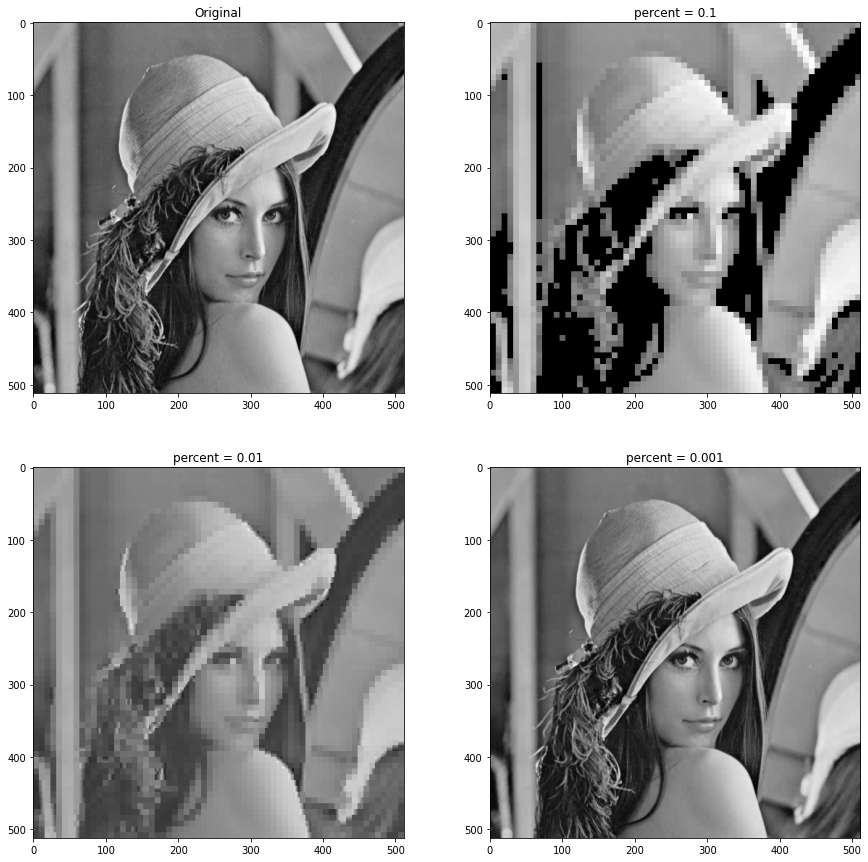

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)


ax = fig.add_subplot(2,2,1)
plt.title('Original')
plt.imshow(img1, cmap="gray")

ax = fig.add_subplot(2,2,2)
plt.title('percent = 0.1')
plt.imshow(img_idct(d[2][0]), cmap="gray")

ax = fig.add_subplot(2,2,3)
plt.title('percent = 0.01')
plt.imshow(img_idct(d[3][0]), cmap="gray")

ax = fig.add_subplot(2,2,4)
plt.title('percent = 0.001')
plt.imshow(img_idct(d[4][0]), cmap="gray")

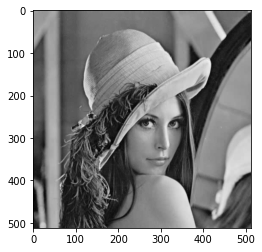

In [ ]:
plt.imshow( img_idct(d[4][0]), cmap="gray")

# Own Tests

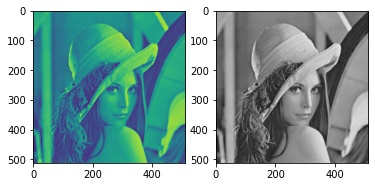

In [ ]:
import imageio
import numpy as np
from scipy.fftpack import dctn, idctn

# input parameters
F = 8
d = 4

# input image
img =  cv2.imread("/content/lena_gray_512.tif",0)


bnimg = img[:, :]  
imageio.imwrite('/content/lena_gray_512.tif', img) # original image
imageio.imwrite('/content/lena_gray_512.tif', bnimg) # black & white image


(rows, cols) = bnimg.shape

# splitting bnimg in FxF blocks
for i in range(1, int(rows / F)):
    for j in range(1, int(cols / F)):

        rowsLower = (i-1) * F
        colsLower = (j-1) * F
        rowsUpper = i * F
        colsUpper = j * F
        block = bnimg[rowsLower:rowsUpper, colsLower:colsUpper]

        # c = DCT2(f)
        c = dctn(block, type=2, norm='ortho')  

        # filtering frequences to the right of d-diagonal
        (blockRows, blockCols) = block.shape
        for k in range(0, blockRows - 1):
            for l in range(0, blockCols - 1):
                if(k + l >= d):
                    c[k,l] = 0

        # ff = IDCT2(c)
        ff = idctn(c, type=2, norm='ortho')  

        # normalizing idct
        ff = np.round(ff)
        for index, value in np.ndenumerate(ff):
            if value < 0:
                ff[index] = 0
            elif value > 255:
                ff[index] = 255

        bnimg[rowsLower:rowsUpper, colsLower:colsUpper] = ff

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(bnimg,cmap="gray")

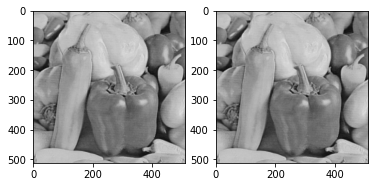

In [ ]:
import imageio
import numpy as np
from scipy.fftpack import dctn, idctn

# input parameters
F = 8
d = 4

# input image
img = cv2.imread('/content/peppers_color.tif') 


bnimg = img[:, :]  
imageio.imwrite('/content/peppers_color.tif', img) # original image
imageio.imwrite('/content/peppers_color.tif', bnimg) # black & white image


(rows, cols, colo) = bnimg.shape

# splitting bnimg in FxF blocks
for i in range(1, int(rows / F)):
    for j in range(1, int(cols / F)):

        rowsLower = (i-1) * F
        colsLower = (j-1) * F
        rowsUpper = i * F
        colsUpper = j * F
        block = bnimg[rowsLower:rowsUpper, colsLower:colsUpper]

        # c = DCT2(f)
        c = dctn(block, type=2, norm='ortho')  

        # filtering frequences to the right of d-diagonal
        (blockRows, blockCols,col) = block.shape
        for k in range(0, blockRows - 1):
            for l in range(0, blockCols - 1):
                if(k + l >= d):
                    c[k,l] = 0

        # ff = IDCT2(c)
        ff = idctn(c, type=2, norm='ortho')  

        # normalizing idct
        ff = np.round(ff)
        for index, value in np.ndenumerate(ff):
            if value < 0:
                ff[index] = 0
            elif value > 255:
                ff[index] = 255

        bnimg[rowsLower:rowsUpper, colsLower:colsUpper] = ff

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(bnimg,cmap="gray")

True


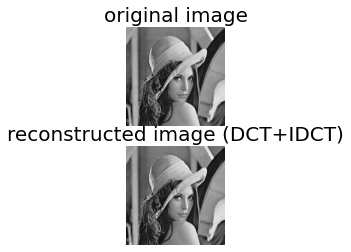

In [ ]:
from scipy.fftpack import dct, idct

# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')    

from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

# read lena RGB image and convert to grayscale
im = rgb2gray(imread('/content/lena_gray_256.tif')) 
imF = dct2(im)
im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
print(np.allclose(im, im1))
# True

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(2,2,1), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.subplot(2,2,3), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()